# IP Rights Strategies 

## Retrieve Dataset

In [78]:
setwd("C:/Users/MG53060/Documents/GitHub/EuropeEconomics")
Data <- readRDS(file = "./CleanData.rds")
Data$ip_owner <- as.factor(Data$ip_owner)

# load Libraries
library(VennDiagram)
library(stargazer)
library(dplyr)

## Overview of the IP Right Usage for the firms in the Data Sample

### IP Rights users VS Non Users

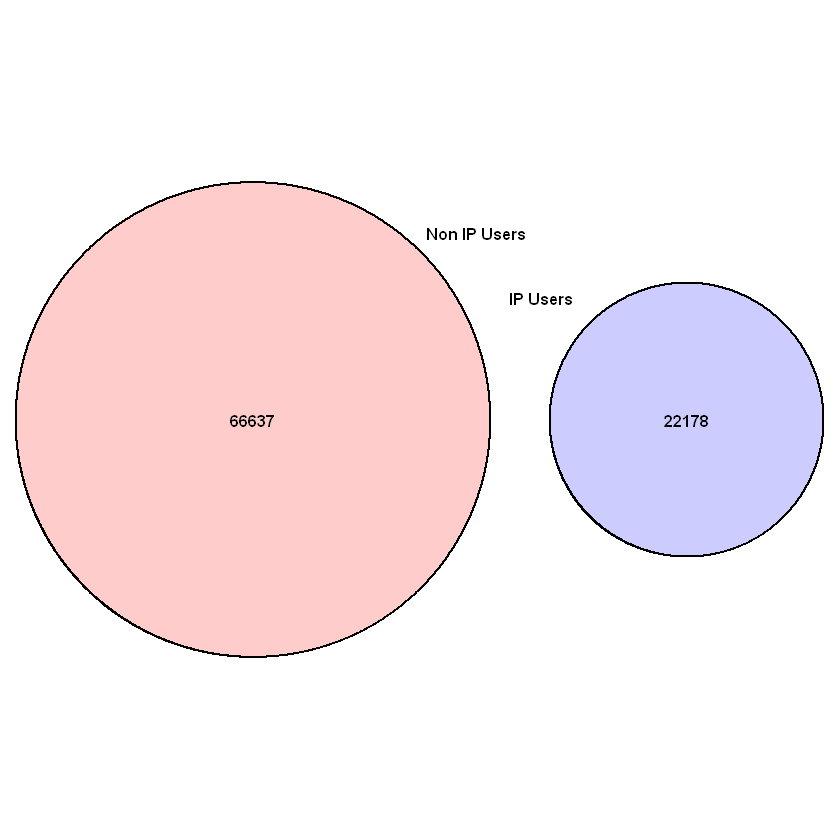

In [79]:
venn_data <- Data

IP_Right_usage <- draw.pairwise.venn(
    area1      = nrow(subset(venn_data, ip_owner == 1)),
    area2      = nrow(subset(venn_data, ip_owner == 0)),
    cross.area = 0,
    category   = c("IP Users", "Non IP Users"),   
    
    # Circles
    lwd = 2,
    fill = c("blue", "red"),
    alpha=c(0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.045),
    cat.fontfamily = "sans",
    #rotation = 1
)

### Distribution of the type of IP Right Combinations within the IP Right Users

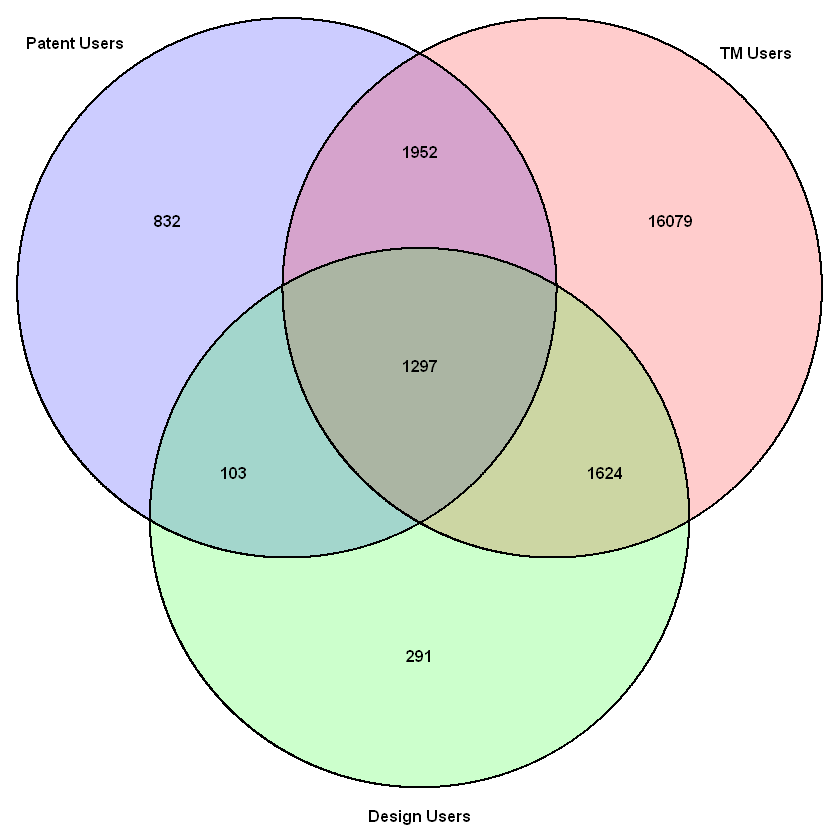

In [80]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("blue", "red", "green"),
    alpha=c(0.2,0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

## Analysis Using Exclusive Indicators

#### Regression Model based on exclusive indicators

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>only</sub> + &Beta;<sub>2</sub> TM<sub>only</sub> + &Beta;<sub>3</sub> DES<sub>only</sub> + &Beta;<sub>4</sub> (PAT & TM)<sub>only</sub> + &Beta;<sub>5</sub> (PAT & DES)<sub>only</sub> + &Beta;<sub>6</sub> (TM & DES)<sub>only</sub> + &Beta;<sub>7</sub> (PAT & TM & DES)<sub>only</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & PAT_{Only} = TM_{Only} = DES_{Only} = (PAT \& TM)_{Only} =& (PAT \& DES)_{Only} =& (TM \& DES)_{Only} = (PAT \& TM \& DES)_{Only} = 0\\
        \beta_0 + \beta_1 & PAT_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_2 & TM_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_3 & DES_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_4 & (PAT \& TM)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_5 & (PAT \& DES)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_6 & (TM \& DES)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_7 & (PAT \& TM \& DES)_{Only} = 1 & &\text{, other dummies ZERO}
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Ip Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Only Patents*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***Only Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>3</sub>:__ provides the difference in terms of mean value between firms which own ***Only Design*** and ***Non Ip Owners*** firms  
__&Beta;<sub>4</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>5</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Trademarks and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents, Trademarks and Designs*** and ***Non Ip Owners*** firms

In [81]:
reg1_1 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des, data = Data)
reg1_2 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des + sector + country + sme , data = Data)
reg_cov_labels <- c("Patent Only", "TM Only", "Design Only", "Patent - TM", "Patent - Design", "TM - Design", "Patent - TM - Design", "SME")
stargazer(reg1_2, reg1_1, type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Exclusive Indicators Analysis", align=FALSE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Exclusive Indicators Analysis
                            Dependent variable:        
                     ----------------------------------
                            log (Rev / Employee)       
                            (1)              (2)       
-------------------------------------------------------
Patent Only          0.163*** (0.032)  0.528*** (0.040)
TM Only              0.228*** (0.008)  0.383*** (0.010)
Design Only           0.115** (0.053)  0.249*** (0.068)
Patent - TM          0.233*** (0.022)  0.684*** (0.027)
Patent - Design        0.135 (0.089)   0.484*** (0.114)
TM - Design          0.232*** (0.023)  0.571*** (0.029)
Patent - TM - Design 0.202*** (0.026)  0.780*** (0.032)
SME                  -0.417*** (0.009)                 
Constant             5.053*** (0.261)  4.621*** (0.004)
-------------------------------------------------------
Country?                    Yes               No       
Sector?                     Yes               No       
-----------------

## Analysis Using Non Exclusive Indicators

#### Regression Model based on non exclusive indicators using cross factors

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>owner</sub> + &Beta;<sub>2</sub> TM<sub>owner</sub> + &Beta;<sub>3</sub> DES<sub>owner</sub> + &Beta;<sub>4</sub> PAT<sub>Owner</sub> * TM<sub>owner</sub> + &Beta;<sub>5</sub> PAT<sub>Owner</sub> * DES<sub>owner</sub> + &Beta;<sub>6</sub> TM<sub>Owner</sub> * DES<sub>owner</sub> + &Beta;<sub>7</sub> PAT<sub>Owner</sub> * TM<sub>Owner</sub> * DES<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0  & \text{ - all dummies are ZERO}\\
        \beta_0 + \beta_1  & PAT_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Patents}  \\
        \beta_0 + \beta_2  & TM_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Trademarks}  \\
        \beta_0 + \beta_3  & DES_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Design}  \\
        \beta_0 + \beta_1 + \beta_2 + \beta_4 &  (PAT)_{Owner} = 1, \, (TM)_{Owner} = 1, \, (PAT \& TM)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and TradeMarks} \\
        \beta_0 + \beta_1 + \beta_3 + \beta_5 &  (PAT)_{Owner} = 1, \, (DES)_{Owner} = 1, \, (PAT \& DES)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and Designs} \\
        \beta_0 + \beta_2 + \beta_3 + \beta_6 & (TM)_{Owner} = 1, \, (DES)_{Owner} = 1, \, (TM \& DES)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and Designs} \\
        \beta_0 + \beta_1 + \beta_2 + \beta_3 + \beta_4 + \beta_5 + \beta_6 + \beta_7 & \text{ - all dummies are ONE - firm owns all type of IP Rights}
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is composed by the firms not owning any kind of IP right defined as ***Non Ip Owners***   
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Only Patents*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***Only Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>3</sub>:__ provides the difference in terms of mean value between firms which own ***Only Design*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>2</sub> + &Beta;<sub>4</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>3</sub> + &Beta;<sub>5</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub> + &Beta;<sub>3</sub> + &Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Trademarks and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>2</sub> + &Beta;<sub>3</sub> + &Beta;<sub>4</sub> + &Beta;<sub>5</sub> + &Beta;<sub>6</sub> + &Beta;<sub>7</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents, Trademarks and Designs*** and ***Non Ip Owners*** firms

In [82]:
reg2_1 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner, data = Data)
reg2_2 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner + sme + sector + country, data = Data)
reg_cov_labels <- c("Patent Owner", "TM Owner", "Design Owner", "SME", "Patent - TM", "Patent - Design", "TM - Design", "Patent - TM - Design")
stargazer(reg2_2, reg2_1, type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels,  omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Inclusive Indicators Analysis", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Inclusive Indicators Analysis
                             Dependent variable:        
                     -----------------------------------
                            log (Rev / Employee)        
                            (1)               (2)       
--------------------------------------------------------
Patent Owner         0.163*** (0.032)  0.528*** (0.040) 
TM Owner             0.228*** (0.008)  0.383*** (0.010) 
Design Owner          0.115** (0.053)  0.249*** (0.068) 
SME                  -0.417*** (0.009)                  
Patent - TM          -0.159*** (0.038) -0.227*** (0.049)
Patent - Design       -0.144 (0.107)   -0.292** (0.138) 
TM - Design           -0.111* (0.058)   -0.061 (0.074)  
Patent - TM - Design   0.109 (0.115)     0.201 (0.148)  
Constant             5.053*** (0.261)  4.621*** (0.004) 
--------------------------------------------------------
Country?                    Yes               No        
Sector?                     Yes               No        


In [83]:
names_vec <- c("patent only", "trademark only", "design only", "patent & trademark", "patent & design", "trademark & design", "patent & trademark & design")
original_coeffs <- c(reg1_2$coefficient[2:8])
#names(original_coeff) <- names_vec
reconstructed_coeffs <- c( reg2_2$coefficient[2] 
                        , reg2_2$coefficient[3]
                        , reg2_2$coefficient[4]
                        , reg2_2$coefficient[2] + reg2_2$coefficient[3] + reg2_2$coefficient[115]
                        , reg2_2$coefficient[2] + reg2_2$coefficient[4] + reg2_2$coefficient[116]
                        , reg2_2$coefficient[3] + reg2_2$coefficient[4] + reg2_2$coefficient[117] 
                        , reg2_2$coefficient[2] + reg2_2$coefficient[3] + reg2_2$coefficient[4] + reg2_2$coefficient[115] + reg2_2$coefficient[116] + reg2_2$coefficient[117] + reg2_2$coefficient[118]  
                        )
#names(reconstructed_coeff) <- names_vec
table_comparison <- data.frame(original_coeffs, reconstructed_coeffs)
stargazer(table_comparison, type="text", summary=FALSE, digits=4)


            original_coeffs reconstructed_coeffs
------------------------------------------------
patent_only     0.1633             0.1633       
tm_only         0.2281             0.2281       
des_only        0.1152             0.1152       
pat_tm          0.2326             0.2326       
pat_des         0.1345             0.1345       
tm_des          0.2322             0.2322       
pat_tm_des      0.2015             0.2015       
------------------------------------------------


## Further Models 

### Focus on Patent Right Ownership

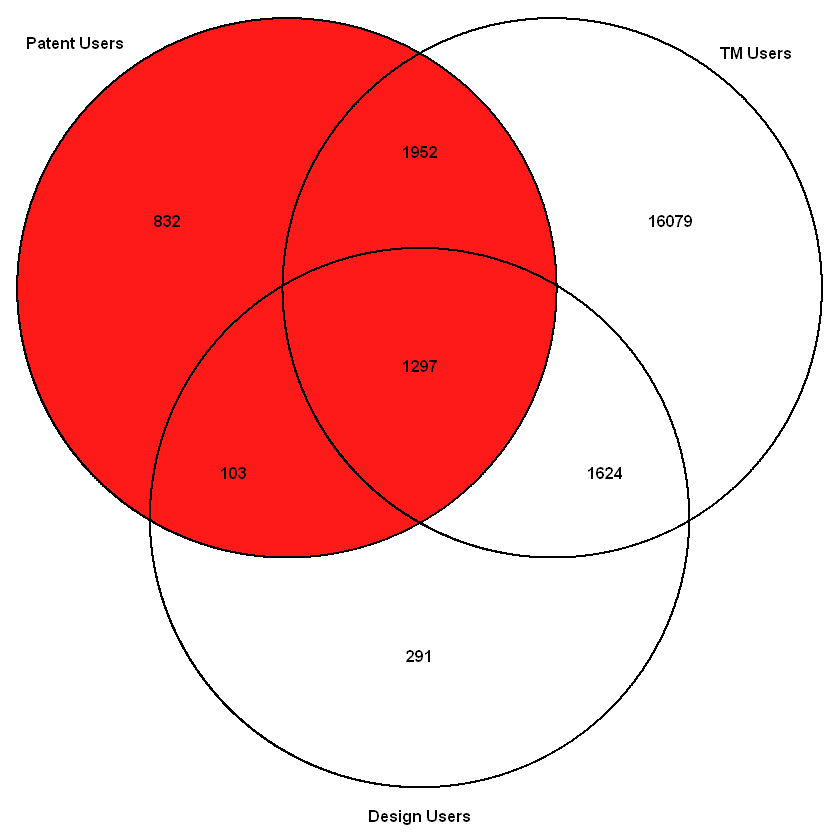

In [84]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("red", "white", "white"),
    alpha=c(0.9,0.,0.),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Regression Model based on non exclusive indicators

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> IP<sub>owner</sub> + &Beta;<sub>2</sub> PAT<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & IP_{Owner} = 0,  PAT_{Owner} = 0\\
        \beta_0 + \beta_1 & IP_{Owner} = 1, PAT_{Owner} = 0\\
        \beta_0 + \beta_1 + \beta_2 & IP_{Owner} = 1, \, PAT_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Ip Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Any Kind of IP Right except for Patents*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Patent*** and firms owning ***Any Kind of IP Right except for Patents***   

In [85]:
reg3_1 = lm(log_rev_empl ~ ip_owner + patent_owner, data = Data)
reg3_2 = lm(log_rev_empl ~ ip_owner + patent_owner + sme + sector + country, data = Data)
reg_cov_labels <- c("B1", "B2", "SME")
stargazer(reg3_2,reg3_1, type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels,  omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Inclusive Indicators Analysis", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Inclusive Indicators Analysis
                    Dependent variable:        
             ----------------------------------
                    log (Rev / Employee)       
                    (1)              (2)       
-----------------------------------------------
B1           0.226*** (0.008)  0.397*** (0.010)
B2            -0.020 (0.016)   0.280*** (0.020)
SME          -0.418*** (0.009)                 
Constant     5.055*** (0.261)  4.621*** (0.004)
-----------------------------------------------
Country?            Yes               No       
Sector?             Yes               No       
-----------------------------------------------
Observations      88,815            88,815     
R2                 0.417            0.030      
Adjusted R2        0.417            0.030      
Note:               *p<0.1; **p<0.05; ***p<0.01


### Focus on Trade Mark Right Ownership

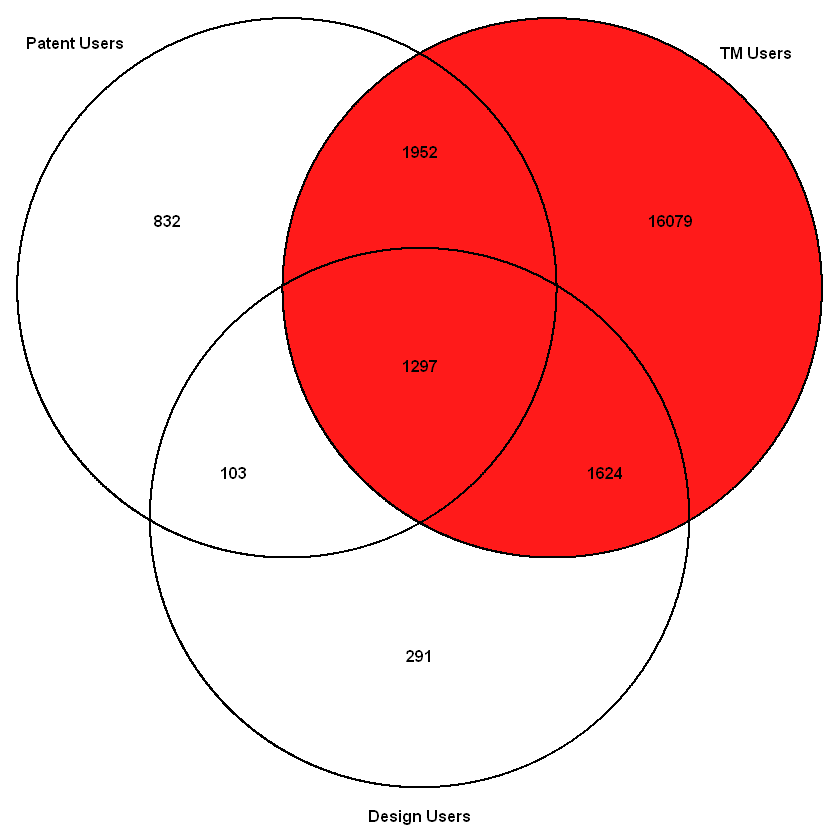

In [86]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("white", "red", "white"),
    alpha=c(0.,0.9,0.),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Regression Model based on non exclusive indicators

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> IP<sub>owner</sub> + &Beta;<sub>2</sub> TM<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & IP_{Owner} = 0,  TM_{Owner} = 0\\
        \beta_0 + \beta_1 & IP_{Owner} = 1, TM_{Owner} = 0\\
        \beta_0 + \beta_1 + \beta_2 & IP_{Owner} = 1, \, TM_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Ip Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Any Kind of IP Right except for Trade Marks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Trade Mark*** and firms owning ***Any Kind of IP Right except for Trade Marks***   

In [87]:
reg4_1 = lm(log_rev_empl ~ ip_owner + tm_owner, data = Data)
reg4_2 = lm(log_rev_empl ~ ip_owner + tm_owner + sme + sector + country, data = Data)
reg_cov_labels <- c("B1", "B2", "SME")
stargazer(reg4_2,reg4_1, type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Inclusive Indicators Analysis", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Inclusive Indicators Analysis
                    Dependent variable:        
             ----------------------------------
                    log (Rev / Employee)       
                    (1)              (2)       
-----------------------------------------------
B1           0.150*** (0.026)  0.458*** (0.033)
B2           0.077*** (0.027)   -0.008 (0.034) 
SME          -0.417*** (0.009)                 
Constant     5.052*** (0.261)  4.621*** (0.004)
-----------------------------------------------
Country?            Yes               No       
Sector?             Yes               No       
-----------------------------------------------
Observations      88,815            88,815     
R2                 0.417            0.028      
Adjusted R2        0.417            0.028      
Note:               *p<0.1; **p<0.05; ***p<0.01


### Focus on Design Right Ownership

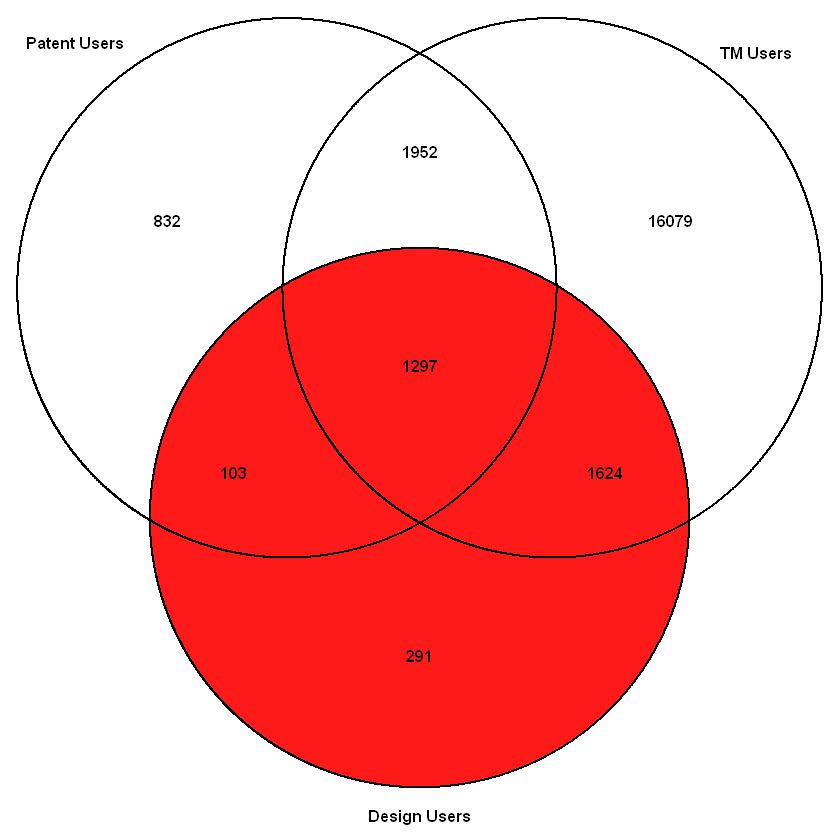

In [88]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("white", "white", "red"),
    alpha=c(0.,0.,0.9),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Regression Model based on non exclusive indicators

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> IP<sub>owner</sub> + &Beta;<sub>2</sub> DES<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & IP_{Owner} = 0,  DES_{Owner} = 0\\
        \beta_0 + \beta_1 & IP_{Owner} = 1, DES_{Owner} = 0\\
        \beta_0 + \beta_1 + \beta_2 & IP_{Owner} = 1, \, DES_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Ip Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Any Kind of IP Right except for Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Design*** and firms owning ***Any Kind of IP Right except for Designs***

In [90]:
reg5_1 = lm(log_rev_empl ~ ip_owner + des_owner, data = Data)
reg5_2 = lm(log_rev_empl ~ ip_owner + des_owner + sme + sector + country, data = Data)
reg_cov_labels <- c("B1", "B2", "SME")
stargazer(reg5_2, reg5_1, type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Inclusive Indicators Analysis", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Inclusive Indicators Analysis
                    Dependent variable:        
             ----------------------------------
                    log (Rev / Employee)       
                    (1)              (2)       
-----------------------------------------------
B1           0.226*** (0.008)  0.420*** (0.010)
B2            -0.018 (0.017)   0.202*** (0.022)
SME          -0.418*** (0.009)                 
Constant     5.057*** (0.261)  4.621*** (0.004)
-----------------------------------------------
Country?            Yes               No       
Sector?             Yes               No       
-----------------------------------------------
Observations      88,815            88,815     
R2                 0.417            0.029      
Adjusted R2        0.417            0.029      
Note:               *p<0.1; **p<0.05; ***p<0.01
